In [1]:
import numpy as np
import pandas as pd

# The DecisionTreeRegressor Class

A from-scratch implementation of the modified classic decision tree algorithm for regression problems with options for minimum sample split and maximum tree depth

In [2]:
from Decision_Tree_Regressor import DecisionTreeRegressor

# Wine Numeric Data 

In [3]:
wine_df = pd.read_csv('../datasets/winequality-red.csv')

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Could we predict sulphates with the other variables?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
X, y = wine_df.drop("sulphates", axis=1), pd.DataFrame(wine_df["sulphates"])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

In [9]:
y_pred = dt_model.predict(X_test)

### Quick visualization of predicted vs actual values

In [10]:
import matplotlib.pyplot as plt

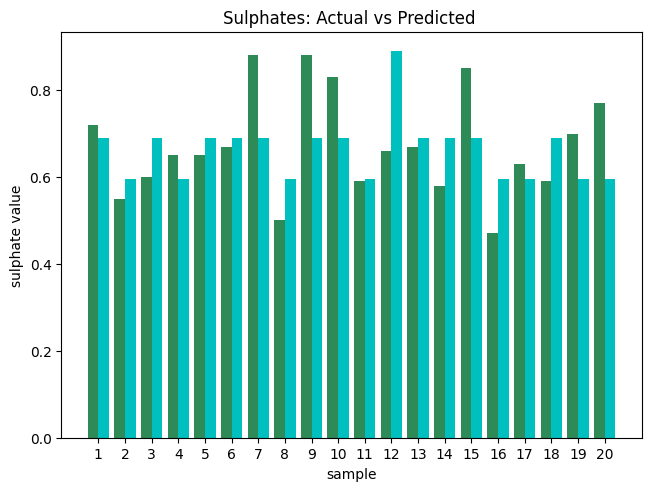

In [11]:
fig, ax = plt.subplots(layout="constrained")

y_test = y_test.reset_index().drop('index', axis=1)
y_pred = pd.DataFrame(y_pred, columns=["sulphates"])

ax.bar(y_test.index[:20]-0.2, y_test['sulphates'][:20], width=0.4, color="seagreen") 
ax.bar(y_test.index[:20]+0.2, y_pred['sulphates'][:20], width=0.4, color="c") 
ax.set_title("Sulphates: Actual vs Predicted ")
ax.set_xticks(np.arange(0,20,1), labels=[i for i in range(1,21)])
ax.set_xlabel("sample")
ax.set_ylabel("sulphate value")
fig.show()

In [12]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.15797027647346737
